<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Simulación matemática. 

**Nombres:** Samuel Rodríguez Partida

**Fecha:** 21 de octubre del 2022.

**Expediente** : 727594.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Samuelrodriguezp

# Tarea 4: Clase 6

## 5. Actividad

1. Ajustar polinomios de grado 1 hasta grado 9 a los siguientes datos.
2. Graficar el error cuadrático acumulado contra el número de términos, y elegir un polinomio que ajuste bien y su grado no sea muy alto.
3. Para el grado del polinomio elegido, realizar el ajuste con ridge con coeficiente de 0.01.
4. Comparar los beta obtenidos del grado seleccionado.



In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
def f(x):
    return np.sinc(x)

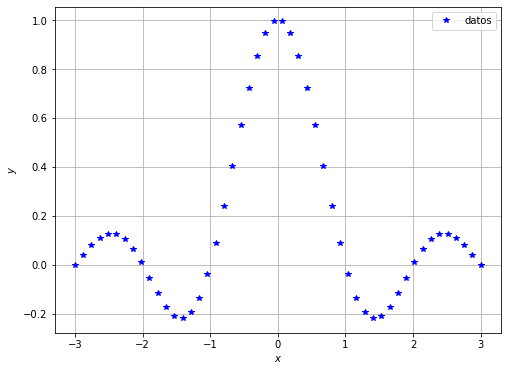

In [6]:
x1 = np.linspace(-3,3)
y1 = f(x1)

plt.figure(figsize=(8,6))
plt.plot(x1, y1, '*b', label = 'datos')
plt.legend(loc='best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()


### Ejercicio 1:

Código de solución 

In [55]:
####Comenzaré ajustando una recta #####

def pol1(beta,x,y):
    yhat = beta[1]*x + beta[0]
    error = y - yhat
    return np.sum(error**2)

beta_inicial = np.zeros(2)

#Resolveré mi error del polinomio 1

sol1 = opt.minimize(pol1,beta_inicial, args=(x1,y1))
sol1

      fun: 6.378425045243545
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 5.36441803e-07, -4.88758087e-06])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([ 1.74007420e-01, -2.32458121e-08])

In [9]:
beta1 = sol1.x
beta1

array([ 1.74007420e-01, -2.32458121e-08])

In [61]:
####Ahora ajustaré una parábola. Polinomio de grado 2 ####

def pol2 (beta,x,y):
    yhat = beta[2]*x**2 + beta[1]*x + beta[0]
    error = y - yhat
    return np.sum(error**2)

beta_inicial = np.zeros(3)

In [62]:
#Resolveré la minimización del error
sol2 = opt.minimize(pol2,beta_inicial,args=(x1,y1))
sol2

      fun: 5.105970218706106
 hess_inv: array([[ 2.25150217e-02, -8.50990494e-11, -4.00807915e-03],
       [-8.50990494e-11,  3.20261467e-03,  1.14657343e-11],
       [-4.00807915e-03,  1.14657343e-11,  1.28363325e-03]])
      jac: array([-5.96046448e-08,  0.00000000e+00,  1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 8
     njev: 12
   status: 0
  success: True
        x: array([ 3.52472034e-01, -7.51497308e-09, -5.71553356e-02])

In [63]:
beta2 = sol2.x
beta2

array([ 3.52472034e-01, -7.51497308e-09, -5.71553356e-02])

In [64]:
#### Polinomio grado 3####

def pol3(beta,x,y):
    yhat = beta.dot([x**i for i in range(4)])
    error = y-yhat
    return np.sum(error**2)

beta_inicial = np.zeros(4)
# Resolver
sol3 = opt.minimize(pol3,beta_inicial,args=(x1,y1))
sol3

      fun: 5.105970218707435
 hess_inv: array([[ 2.25151493e-02, -3.46056524e-04, -4.00810614e-03,
         5.19923954e-05],
       [-3.46056524e-04,  9.77927095e-01,  7.33974827e-05,
        -1.46913616e-01],
       [-4.00810614e-03,  7.33974827e-05,  1.28363896e-03,
        -1.10274232e-05],
       [ 5.19923954e-05, -1.46913616e-01, -1.10274232e-05,
         2.21560835e-02]])
      jac: array([ 4.76837158e-07, -5.36441803e-07, -1.25169754e-06,  2.14576721e-06])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 6
     njev: 12
   status: 0
  success: True
        x: array([ 3.52472054e-01,  1.98259704e-07, -5.71553399e-02, -3.69264038e-08])

In [65]:
beta3 = sol3.x
beta3

array([ 3.52472054e-01,  1.98259704e-07, -5.71553399e-02, -3.69264038e-08])

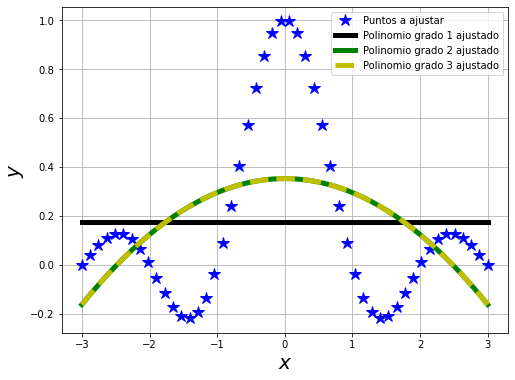

In [66]:
#### Graficar polinomios grado 1,2 y 3 ####

yhat1 = (beta1[1]*x1 + beta1[0])
yhat2 = (beta2[2]*x1**2 + beta2[1]*x1 + beta2[0])
yhat3 = beta3.dot([x1**i for i in range (4)])


plt.figure(figsize=(8,6))

#Agregar puntos y línea ajustada
plt.plot(x1,y1,'*b',ms = 12, label='Puntos a ajustar')
plt.plot(x1, yhat1,'k',lw=5,label='Polinomio grado 1 ajustado')
plt.plot(x1, yhat2, 'g', lw=5, label='Polinomio grado 2 ajustado')
plt.plot(x1, yhat3, '--y', lw=5, label='Polinomio grado 3 ajustado')

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)

plt.grid()
plt.legend(loc='best')
plt.show()

Procederé a ajustar los polinomios de grados 4 a 5 y graficarlos

In [67]:
#### Polinomio grado 4####

def pol4(beta,x,y):
    yhat = beta.dot([x**i for i in range(5)])
    error = y-yhat
    return np.sum(error**2)

beta_inicial = np.zeros(5)
# Resolver
sol4 = opt.minimize(pol4,beta_inicial,args=(x1,y1))
sol4

      fun: 3.074856919925876
 hess_inv: array([[ 3.52242998e-02,  3.75306122e-09, -1.76042335e-02,
         4.14833144e-09,  1.69563630e-03],
       [ 3.75306122e-09,  2.00725942e-02, -2.85977996e-09,
        -3.00316013e-03,  3.15059566e-10],
       [-1.76042335e-02, -2.85977996e-09,  1.58331576e-02,
        -1.15987166e-08, -1.81457475e-03],
       [ 4.14833145e-09, -3.00316013e-03, -1.15987166e-08,
         5.34616582e-04,  1.51297925e-09],
       [ 1.69563630e-03,  3.15059566e-10, -1.81457475e-03,
         1.51297925e-09,  2.26308873e-04]])
      jac: array([ 0.00000000e+00, -5.96046448e-08,  0.00000000e+00, -2.98023224e-08,
       -2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 120
      nit: 10
     njev: 20
   status: 0
  success: True
        x: array([ 5.79670171e-01,  2.15196913e-07, -3.00152390e-01, -3.96485522e-08,
        3.03047615e-02])

In [68]:
beta4 = sol4.x
beta4

array([ 5.79670171e-01,  2.15196913e-07, -3.00152390e-01, -3.96485522e-08,
        3.03047615e-02])

In [69]:
#### Polinomio grado 5 ####

def pol5(beta,x,y):
    yhat = beta.dot([x**i for i in range(6)])
    error = y-yhat
    return np.sum(error**2)

beta_inicial = np.zeros(6)
# Resolver
sol5 = opt.minimize(pol5,beta_inicial,args=(x1,y1))
sol5

      fun: 3.0748569206897094
 hess_inv: array([[ 3.52247047e-02,  9.26815737e-07, -1.75934674e-02,
        -2.82075744e-07,  1.69414424e-03,  3.78954229e-08],
       [ 9.26815737e-07,  6.17459615e-02, -4.87316734e-07,
        -2.38252868e-02,  4.78242814e-08,  2.00536880e-03],
       [-1.75934674e-02, -4.87316734e-07,  1.58320003e-02,
         3.00133544e-07, -1.81463962e-03,  1.06882264e-08],
       [-2.82075744e-07, -2.38252868e-02,  3.00133544e-07,
         1.09384298e-02, -3.54315021e-08, -1.00198657e-03],
       [ 1.69414424e-03,  4.78242814e-08, -1.81463962e-03,
        -3.54315021e-08,  2.26348903e-04, -2.26966272e-09],
       [ 3.78954230e-08,  2.00536880e-03,  1.06882265e-08,
        -1.00198657e-03, -2.26966273e-09,  9.65010107e-05]])
      jac: array([-1.38878822e-05, -2.28285789e-05,  8.46385956e-06, -9.11951065e-05,
        2.02655792e-06, -3.82333994e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 404
      nit: 9
     njev: 56

In [70]:
beta5 = sol5.x
beta5

array([ 5.79669536e-01, -7.81171732e-06, -3.00152015e-01,  3.89868622e-06,
        3.03047230e-02, -3.77391448e-07])

In [37]:
#### Polinomio grado 6 ####

def pol6(beta,x,y):
    yhat = beta.dot([x**i for i in range(7)])
    error = y-yhat
    return np.sum(error**2)

beta_inicial = np.zeros(7)

# Resolver
sol6 = opt.minimize(pol6,beta_inicial,args=(x1,y1))
sol6

      fun: 0.6971665862051861
 hess_inv: array([[ 4.80265645e-02,  8.26377600e-07, -4.64414430e-02,
        -3.85221689e-07,  1.09716839e-02,  3.48858530e-08,
        -7.28959580e-04],
       [ 8.26377600e-07,  6.17458195e-02,  6.48288965e-07,
        -2.38253318e-02, -3.01388220e-07,  2.00537540e-03,
         2.55230280e-08],
       [-4.64414430e-02,  6.48288965e-07,  8.07911066e-02,
        -1.65504411e-07, -2.27099878e-02,  1.06347407e-08,
         1.64208937e-03],
       [-3.85221689e-07, -2.38253318e-02, -1.65504411e-07,
         1.09384847e-02,  9.41373350e-08, -1.00199259e-03,
        -8.29470150e-09],
       [ 1.09716839e-02, -3.01388220e-07, -2.27099878e-02,
         9.41373351e-08,  6.94741919e-03, -6.92213634e-09,
        -5.28162053e-04],
       [ 3.48858530e-08,  2.00537540e-03,  1.06347407e-08,
        -1.00199259e-03, -6.92213633e-09,  9.65015329e-05,
         6.20392116e-10],
       [-7.28959580e-04,  2.55230280e-08,  1.64208937e-03,
        -8.29470151e-09, -5.28162053

In [38]:
beta6 = sol6.x
beta6

array([ 8.26440673e-01, -7.82196991e-06, -8.56046479e-01,  3.97401328e-06,
        2.09100918e-01, -3.87034448e-07, -1.40497324e-02])

Graficación

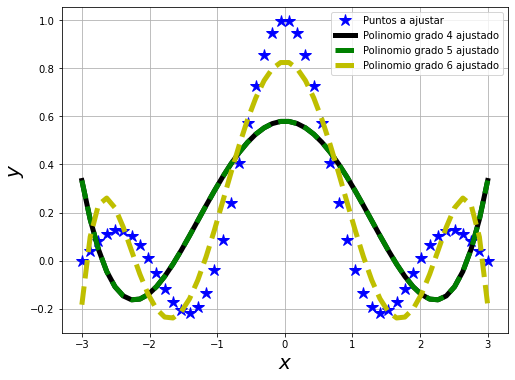

In [40]:
#### Graficar polinomios grado 4,5 y 6 ####

yhat4 = beta4.dot([x1**i for i in range (5)])
yhat5 = beta5.dot([x1**i for i in range (6)])
yhat6 = beta6.dot([x1**i for i in range (7)])


plt.figure(figsize=(8,6))

#Agregar puntos y línea ajustada
plt.plot(x1,y1,'*b',ms = 12, label='Puntos a ajustar')
plt.plot(x1, yhat4,'k',lw=5,label='Polinomio grado 4 ajustado')
plt.plot(x1, yhat5, '--g', lw=5, label='Polinomio grado 5 ajustado')
plt.plot(x1, yhat6, '--y', lw=5, label='Polinomio grado 6 ajustado')

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)

plt.grid()
plt.legend(loc='best')
plt.show()

Ajuste de polinomios de grado 7 al 9

In [41]:
#### Polinomio grado 7####

def pol7(beta,x,y):
    yhat = beta.dot([x**i for i in range(8)])
    error = y-yhat
    return np.sum(error**2)

beta_inicial = np.zeros(8)
# Resolver
sol7 = opt.minimize(pol7,beta_inicial,args=(x1,y1))
sol7


      fun: 0.6971668250698767
 hess_inv: array([[ 4.80450533e-02, -3.25359069e-07, -4.63426360e-02,
        -4.34123914e-07,  1.09370579e-02, -5.36880539e-07,
        -7.26255820e-04,  7.31679574e-08],
       [-3.25359070e-07,  1.39776475e-01, -1.57009942e-06,
        -9.92810429e-02,  5.52758835e-07,  1.98316915e-02,
        -4.32127505e-08, -1.18438532e-03],
       [-4.63426360e-02, -1.57009942e-06,  8.13274680e-02,
        -1.66784096e-06, -2.28975510e-02, -3.07298762e-06,
         1.65671936e-03,  4.05615464e-07],
       [-4.34123914e-07, -9.92810429e-02, -1.66784096e-06,
         8.39042024e-02,  5.95582609e-07, -1.82400186e-02,
        -4.67658548e-08,  1.14529745e-03],
       [ 1.09370579e-02,  5.52758835e-07, -2.28975510e-02,
         5.95582609e-07,  7.01305873e-03,  1.07613746e-06,
        -5.33284193e-04, -1.42242986e-07],
       [-5.36880539e-07,  1.98316915e-02, -3.07298762e-06,
        -1.82400186e-02,  1.07613746e-06,  4.16897639e-03,
        -8.40798913e-08, -2.70577175

In [42]:
beta7 = sol7.x
beta7

array([ 8.26474176e-01,  4.37785597e-05, -8.56081185e-01, -9.85438215e-05,
        2.09109556e-01,  2.92014176e-05, -1.40503271e-02, -2.16511205e-06])

In [43]:
#### Polinomio grado 8 ####

def pol8(beta,x,y):
    yhat = beta.dot([x**i for i in range(9)])
    error = y-yhat
    return np.sum(error**2)

beta_inicial = np.zeros(9)

# Resolver
sol8 = opt.minimize(pol8,beta_inicial,args=(x1,y1))
sol8

      fun: 0.05489387382616145
 hess_inv: array([[ 6.11532936e-02,  1.75229418e-04, -9.68316707e-02,
        -1.44329501e-04,  4.07405587e-02,  3.25805690e-05,
        -6.27498289e-03, -2.12841577e-06,  3.19295662e-04],
       [ 1.75229418e-04,  1.40671948e-01, -4.84497070e-04,
        -9.99628067e-02,  2.43507425e-04,  1.99731144e-02,
        -4.10095430e-05, -1.19303432e-03,  2.20221696e-06],
       [-9.68316707e-02, -4.84497070e-04,  2.75385900e-01,
         3.85337705e-04, -1.37812794e-01, -8.37498009e-05,
         2.30977335e-02,  5.31640347e-06, -1.23562345e-03],
       [-1.44329501e-04, -9.99628067e-02,  3.85337705e-04,
         8.44377534e-02, -1.91880875e-04, -1.83523118e-02,
         3.21634555e-05,  1.15222686e-03, -1.72212052e-06],
       [ 4.07405587e-02,  2.43507425e-04, -1.37812794e-01,
        -1.91880875e-04,  7.50545435e-02,  4.14428989e-05,
        -1.32257645e-02, -2.61962210e-06,  7.31323486e-04],
       [ 3.25805690e-05,  1.99731144e-02, -8.37498009e-05,
        -

In [48]:
beta8 = sol8.x
beta8

array([ 9.54698458e-01, -2.12066569e-04, -1.35456172e+00,  7.86038456e-05,
        5.04264251e-01, -1.24726177e-05, -6.90884325e-02,  7.40152700e-07,
        3.17017622e-03])

In [45]:
#### Polinomio grado 9 ####

def pol9(beta,x,y):
    yhat = beta.dot([x**i for i in range(10)])
    error = y-yhat
    return np.sum(error**2)

beta_inicial = np.zeros(10)

# Resolver
sol9 = opt.minimize(pol9,beta_inicial,args=(x1,y1))
sol9

      fun: 0.05530230636148676
 hess_inv: array([[ 6.22494331e-02, -7.38486946e-04, -9.87778173e-02,
         5.92626174e-04,  4.14826361e-02, -1.40836196e-04,
        -6.37530993e-03,  1.25096627e-05,  3.23765629e-04,
        -3.47262904e-07],
       [-7.38486946e-04,  3.64191880e-01,  1.03002203e-02,
        -4.23596628e-01, -6.76014523e-03,  1.50011193e-01,
         1.29732592e-03, -2.06610771e-02, -7.54704118e-05,
         9.71652451e-04],
       [-9.87778173e-02,  1.03002203e-02,  2.79630940e-01,
        -1.24604604e-02, -1.39681845e-01,  4.47908833e-03,
         2.33843560e-02, -6.21296026e-04, -1.24995815e-03,
         2.93315187e-05],
       [ 5.92626174e-04, -4.23596628e-01, -1.24604604e-02,
         5.58207721e-01,  8.34145263e-03, -2.09868226e-01,
        -1.61349809e-03,  2.99348658e-02,  9.42733872e-05,
        -1.44040174e-03],
       [ 4.14826361e-02, -6.76014523e-03, -1.39681845e-01,
         8.34145263e-03,  7.59371920e-02, -3.03699237e-03,
        -1.33679965e-02,  4.

In [46]:
beta9 = sol9.x
beta9

array([ 9.54702140e-01, -9.47426385e-03, -1.35510356e+00,  1.54523122e-02,
        5.04729828e-01, -6.62181233e-03, -6.91892361e-02,  1.03237440e-03,
        3.17645878e-03, -5.29836191e-05])

Graficación

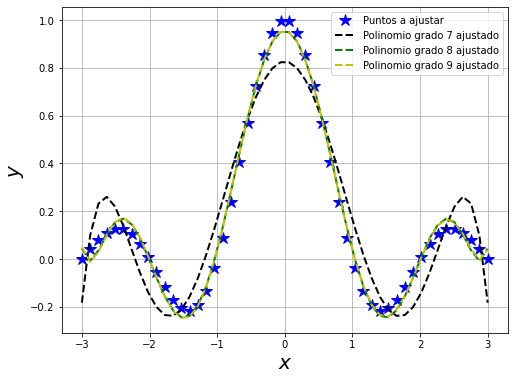

In [73]:
#### Graficar polinomios grado 7,8 y 9 ####

yhat7 = beta7.dot([x1**i for i in range (8)])
yhat8 = beta8.dot([x1**i for i in range (9)])
yhat9 = beta9.dot([x1**i for i in range (10)])


plt.figure(figsize=(8,6))

#Agregar puntos y línea ajustada
plt.plot(x1,y1,'*b',ms = 12, label='Puntos a ajustar')
plt.plot(x1, yhat7,'--k', lw=2, label='Polinomio grado 7 ajustado')
plt.plot(x1, yhat8,'--g', lw=2, label='Polinomio grado 8 ajustado')
plt.plot(x1, yhat9,'--y', lw=2, label='Polinomio grado 9 ajustado')

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)

plt.grid()
plt.legend(loc='best')
plt.show()

**Ahora graficaremos los errores cuadráticos para encontrar el polinomio más adecuado**

#Método del codo

[]

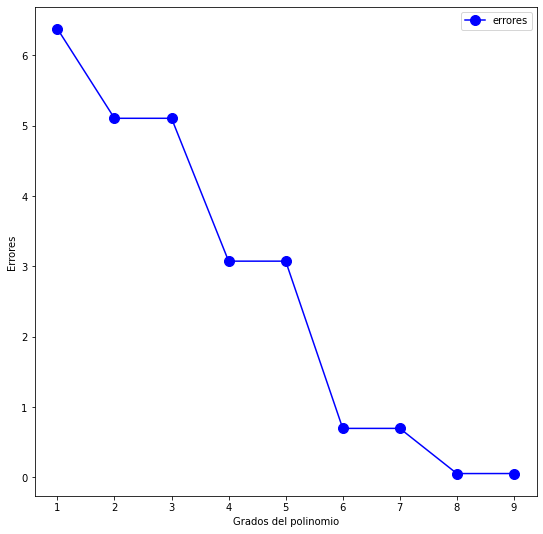

In [72]:
e = [sol1.fun, sol2.fun, sol3.fun, sol4.fun, sol5.fun, sol6.fun, sol7.fun, sol8.fun, sol9.fun]
grados = [1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.figure(figsize=(9,9))
plt.plot(grados, e, 'ob-', ms=10, label='errores')
plt.legend()
plt.xlabel('Grados del polinomio', fontsize=10)
plt.ylabel('Errores', fontsize=10)
plt.plot()


Elegiré el polinomio de grado 6. Con base en la gráfica anterior pude observar que el error cae bastante (a comparación del grado último, el 5) y todavía no es un polinomio de los 3 grados mayores

###  Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

In [87]:
#Iniciaré la prevencio del overfitting con el método ridge
#Crearé una nueva función

def pol6_ridge (beta,x,y,n):
    lam = 0.01
    yhat = beta.dot([x**i for i in range(n+1)])
    error = y-yhat
    return np.sum(error**2) + lam * np.linalg.norm(beta,2)**2

n=6
beta_inicial = np.zeros(n+1)


In [81]:
#Resolución
sol6_ridge = opt.minimize(pol6_ridge, beta_inicial, args=(x1,y1,n))
sol6_ridge

      fun: 0.7117288119002911
 hess_inv: array([[ 4.79349076e-02,  1.03895945e-06, -4.63183630e-02,
        -4.74477472e-07,  1.09390510e-02,  4.35827539e-08,
        -7.26658908e-04],
       [ 1.03895945e-06,  6.16583348e-02, -1.30881791e-08,
        -2.37907313e-02, -9.77500492e-08,  2.00242391e-03,
         1.02191739e-08],
       [-4.63183630e-02, -1.30881791e-08,  8.06113298e-02,
         7.66786355e-08, -2.26612250e-02, -1.00106173e-08,
         1.63861460e-03],
       [-4.74477472e-07, -2.37907313e-02,  7.66786355e-08,
         1.09247461e-02,  2.06795869e-08, -1.00081819e-03,
        -2.80526655e-09],
       [ 1.09390510e-02, -9.77500492e-08, -2.26612250e-02,
         2.06795869e-08,  6.93411399e-03, -7.64962384e-10,
        -5.27211301e-04],
       [ 4.35827539e-08,  2.00242391e-03, -1.00106173e-08,
        -1.00081819e-03, -7.64962391e-10,  9.64010295e-05,
         1.63227442e-10],
       [-7.26658908e-04,  1.02191739e-08,  1.63861460e-03,
        -2.80526655e-09, -5.27211301

In [82]:
sol6_ridge.x

array([ 8.26440673e-01, -7.82196991e-06, -8.56046479e-01,  3.97401328e-06,
        2.09100918e-01, -3.87034448e-07, -1.40497324e-02])

In [83]:
beta6_ridge = sol6_ridge.x
beta6_ridge

array([ 8.24809452e-01, -7.80854115e-06, -8.53805636e-01,  3.96871210e-06,
        2.08503015e-01, -3.86578822e-07, -1.40074530e-02])

In [105]:
#Comparando los betas de mi función 6 original y noto que la diferencia es pequeñísima.
beta6

array([ 8.26440673e-01, -7.82196991e-06, -8.56046479e-01,  3.97401328e-06,
        2.09100918e-01, -3.87034448e-07, -1.40497324e-02])

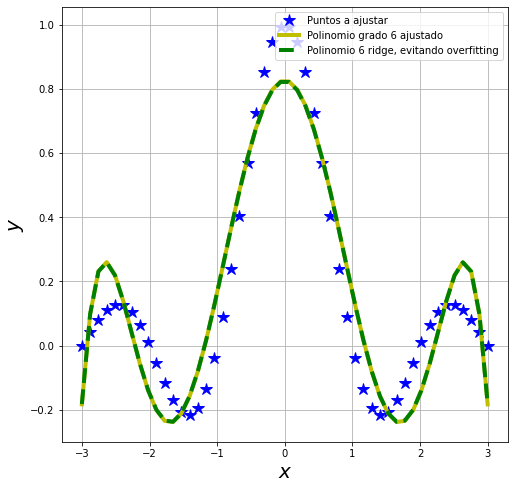

In [86]:
#### Graficar polinomio 6 y polinomio 6 ridge ####

yhat6 = beta6.dot([x1**i for i in range (7)])
yhat6_ridge = (beta6_ridge.dot([x1**i for i in range(7)]))

#Formato y valores
plt.figure(figsize=(8,8))
plt.plot(x1,y1,'*b',ms = 12, label='Puntos a ajustar')
plt.plot(x1, yhat6, 'y', lw=4, label='Polinomio grado 6 ajustado')
plt.plot(x1, yhat6_ridge, '--g', lw=4, label='Polinomio 6 ridge, evitando overfitting')

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)

plt.grid()
plt.legend(loc='best')
plt.show()

**Observo que mi polinomio en Ridge es igual al polinomio normal. También observo que me aparece un mensaje de 'pérdida de  precisión'. Usaré el ridge en el polinomio de grado 4 para analizar si evito el error de precisión**

In [95]:
#establecer función

def pol4_ridge (beta,x,y,n):
    lam=0.01
    yhat = beta.dot([x**i for i in range(n+1)])
    error = y - yhat
    return np.sum(error**2) + lam * np.linalg.norm(beta,2)**2

n=4
beta_inicial = np.zeros(n+1)

sol4_ridge = opt.minimize(pol4_ridge, beta_inicial, args=(x1,y1,n))
sol4_ridge

      fun: 3.079123317409141
 hess_inv: array([[ 3.51932489e-02, -2.61858304e-10, -1.75862134e-02,
         4.88279944e-09,  1.69379725e-03],
       [-2.61858303e-10,  2.00643606e-02, -1.14627039e-09,
        -3.00192314e-03,  1.64910267e-10],
       [-1.75862134e-02, -1.14627039e-09,  1.58218563e-02,
        -1.22306268e-08, -1.81339131e-03],
       [ 4.88279945e-09, -3.00192314e-03, -1.22306268e-08,
         5.34430599e-04,  1.58422186e-09],
       [ 1.69379725e-03,  1.64910267e-10, -1.81339131e-03,
         1.58422186e-09,  2.26183951e-04]])
      jac: array([2.98023224e-08, 0.00000000e+00, 5.96046448e-08, 2.98023224e-08,
       5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 120
      nit: 10
     njev: 20
   status: 0
  success: True
        x: array([ 5.79155622e-01,  2.15681319e-07, -2.99852572e-01, -3.97161594e-08,
        3.02741204e-02])

In [96]:
beta4_ridge = sol4_ridge.x
beta4_ridge


array([ 5.79155622e-01,  2.15681319e-07, -2.99852572e-01, -3.97161594e-08,
        3.02741204e-02])

**Observo que la operación se terminó satisfactoriamente y no hay pérdida de precisión**

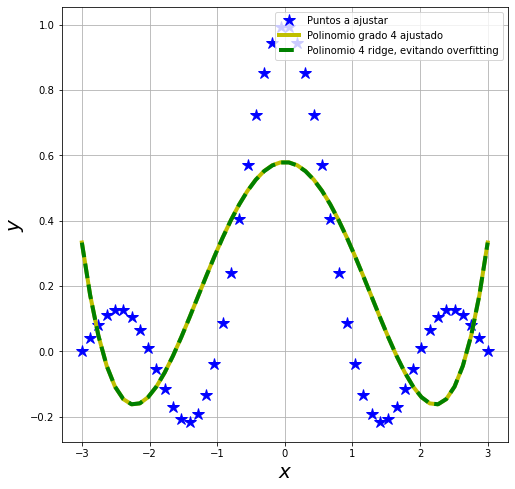

In [97]:
#### Graficar polinomio 6 y polinomio 6 ridge ####

yhat4 = beta4.dot([x1**i for i in range (5)])
yhat4_ridge = (beta4_ridge.dot([x1**i for i in range(5)]))

#Formato y valores
plt.figure(figsize=(8,8))
plt.plot(x1,y1,'*b',ms = 12, label='Puntos a ajustar')
plt.plot(x1, yhat4, 'y', lw=4, label='Polinomio grado 4 ajustado')
plt.plot(x1, yhat4_ridge, '--g', lw=4, label='Polinomio 4 ridge, evitando overfitting')

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)

plt.grid()
plt.legend(loc='best')
plt.show()

**He observado que la sobreposición del polinomio ridge y el polinomio normal no es cuestión exclusiva del grado 6, así que pienso que en ninguno de los dos casos se hubiera dado un overfitting.
Por tanto, tomaré como más acertados los betas del polinomio de grado 6, que se asemejan a la curva pero no la siguen de manera exacta**

### Respuesta planteada en el ejercicio usando (markdown)

El polinomio de grado 6 con betas

$$\beta_0=8.24809452e-01$$
$$\beta_1=-7.80854115e-06$$ 
$$\beta_2=-8.53805636e-01$$
$$\beta_3=3.96871210e-06$$
$$\beta_4=2.08503015e-01$$
$$\beta_5=-3.86578822e-07$$
$$\beta_6=-1.40074530e-02$$

es el que más responde al ejercicio de la curva presentada, pues tiene un error relativamente bajo y no es de un grado polinomial alto. Se pudo haber elegido quizá el polinomio de grado 8, pero la instrucción del ejercicio pedía elegir un polinomio de grado no muy alto.